<a href="https://colab.research.google.com/github/RifaldiAchmad/Data-Analysis-with-Python/blob/main/Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparation**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/RifaldiAchmad/Data-Analysis-with-Python/refs/heads/main/Dataset/customers.csv")
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [ ]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/RifaldiAchmad/Data-Analysis-with-Python/refs/heads/main/Dataset/orders.csv")
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [ ]:
product_df = pd.read_csv("https://raw.githubusercontent.com/RifaldiAchmad/Data-Analysis-with-Python/refs/heads/main/Dataset/products.csv")
product_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


In [ ]:
sales_df = pd.read_csv("https://raw.githubusercontent.com/RifaldiAchmad/Data-Analysis-with-Python/refs/heads/main/Dataset/sales.csv")
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


# **Assessing**

## Customers Table

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


There are different amounts of data from gender column

In [ ]:
customers_df.isna().sum()

,0
customer_id,0
customer_name,0
gender,18
age,0
home_address,0
zip_code,0
city,0
state,0
country,0


We can see that there are 18 missing values from gender column

In [ ]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  6


And there's also have 6 duplicate values

In [ ]:
customers_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


From these statistical parameters, we know that there is an oddity in the maximum age number, so we call it inaccurate data

## Orders Table

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


- There are something odd about the order_date column and delivery_date column, here it is of type object, it should be of type datetime
- No missing values

In [ ]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


There are no duplicate values and strange things from this check

## Product Table

In [ ]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.2+ KB


That's all safe!

In [ ]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())
product_df.describe()

Jumlah duplikasi:  6


,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


We have 6 duplicate data here!

## Sales Table

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


From the total_prize column, we know that there are a number of missing values

In [ ]:
sales_df.isna().sum()

,0
sales_id,0
order_id,0
product_id,0
price_per_unit,0
quantity,0
total_price,19


We see that are 19 missing values!

In [ ]:
print("Jumlah duplikasi: ", sales_df.duplicated().sum())
sales_df.describe()

Jumlah duplikasi:  0


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


It is safe!

# **Data Cleaning**

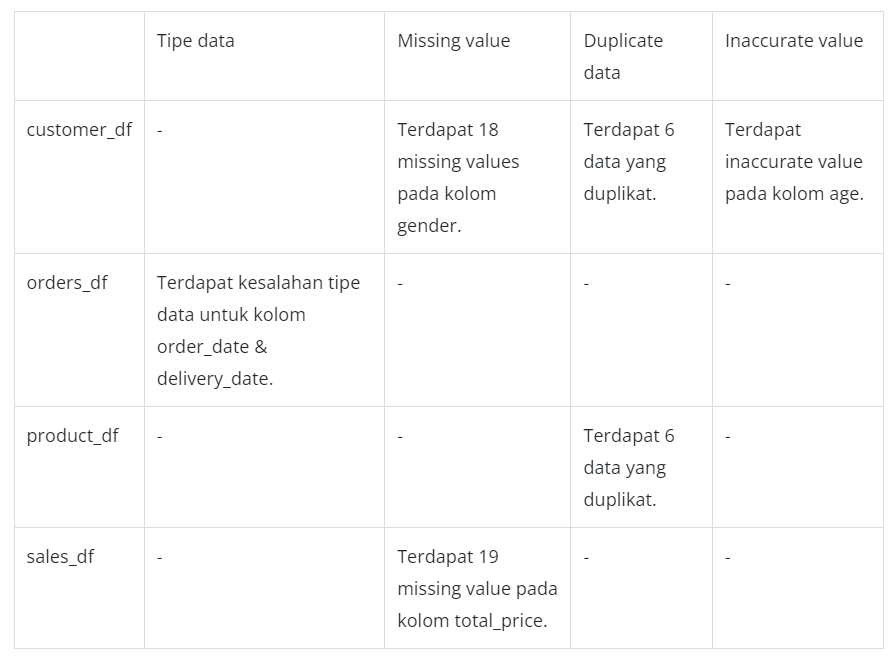

## Customers Table: Duplicates Data and Missing Value

In [ ]:
customers_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
customers_df[customers_df["gender"].isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


## Customers Table: Inaccurate Data

In [ ]:
customers_df["gender"].value_counts()

,count
gender,
Prefer not to say,725
Male,143
Female,115


In [ ]:
customers_df["gender"].mode()[0]

'Prefer not to say'

In [ ]:
customers_df.fillna(value=customers_df["gender"].mode()[0], inplace=True)
customers_df.isna().sum()

,0
customer_id,0
customer_name,0
gender,0
age,0
home_address,0
zip_code,0
city,0
state,0
country,0


In [ ]:
customers_df[customers_df["age"] == customers_df["age"].max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


In [ ]:
customers_df["age"].replace(customers_df["age"].max(), 70, inplace=True)

In [ ]:
customers_df[customers_df["age"] == customers_df["age"].max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


In [ ]:
customers_df["age"].replace(customers_df["age"].max(), 50, inplace=True)

In [ ]:
customers_df[customers_df["age"] == customers_df["age"].max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
34,35,fulan 35,Male,80,3168 Bartoletti CrescentSuite 878,593,Port Lucas,Queensland,Australia
38,39,fulan 39,Prefer not to say,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
142,143,fulan 143,Prefer not to say,80,87 Hahn Station StSuite 943,8254,New Ella,Victoria,Australia
154,155,fulan 155,Male,80,85 Charles MallSuite 424,7841,Port Sophia,New South Wales,Australia
170,171,fulan 171,Prefer not to say,80,16 Boyer WaySuite 018,6226,South Gabriel,Western Australia,Australia
174,175,fulan 175,Prefer not to say,80,57 David MallSuite 596,3129,Haneton,South Australia,Australia
181,182,fulan 182,Male,80,32 Thomas CrestSuite 753,2147,Archiefurt,Queensland,Australia
235,236,fulan 236,Prefer not to say,80,64 Phillips RunApt. 722,2752,East Sienna,New South Wales,Australia
424,424,fulan 424,Prefer not to say,80,03 Grant CrestSuite 228,5743,Lake Charliemouth,Western Australia,Australia
438,438,fulan 438,Prefer not to say,80,569 Alyssa IslandApt. 766,6893,Hunterland,Western Australia,Australia


## Orders Table: Data Type

In [ ]:
datetime_columns = ["order_date", "delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


## Product Table: Duplicates Data

In [ ]:
product_df.drop_duplicates(inplace=True)

print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


## Product Table: Innacurate Data

In [ ]:
sales_df[sales_df["total_price"].isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


In [ ]:
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]

sales_df.isna().sum()

,0
sales_id,0
order_id,0
product_id,0
price_per_unit,0
quantity,0
total_price,0


# **Save to CSV**

In [ ]:
customers_df.to_csv("customers_clean.csv", index=False)
orders_df.to_csv("orders_clean.csv", index=False)
product_df.to_csv("products_clean.csv", index=False)
sales_df.to_csv("sales_clean.csv", index=False)